In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.options.display.max_columns=999 
plt.style.use('fivethirtyeight')

# One Quantitative Variable - Measures Of Center

The overall pattern of the distribution of a quantitative variable is described by its shape, center, and spread. By inspecting the histogram, we can describe the shape of the distribution, but as we saw, we can only get a rough estimate for the center and spread. A description of the distribution of a quantitative variable must include, in addition to the graphical display, a more precise numerical description of the center and spread of the distribution. In this section we will learn:

* how to quantify the center and spread of a distribution with various numerical measures;
* some of the properties of those numerical measures; and
* how to choose the appropriate numerical measures of center and spread to supplement the histogram.

# Mode, Mean & Median 

Intuitively speaking, the numerical measure of center is telling us what is a “typical value” of the distribution.

The three main numerical measures for the center of a distribution are the mode, the mean and the median. Each one of these measures is based on a completely different idea of describing the center of a distribution. We will first present each one of the measures, and then compare their properties.

## Mode 

So far, when we looked at the shape of the distribution, we identified the mode as the value where the distribution has a “peak” and saw examples when distributions have one mode (unimodal distributions) or two modes (bimodal distributions). In other words, so far we identified the mode visually from the histogram.

Technically, the mode is the most commonly occurring value in a distribution. For simple datasets where the frequency of each value is available or easily determined, the value that occurs with the highest frequency is the mode.

### Example: Best Actress Oscar Winners

We will continue with the Best Actress Oscar winners example.

In [2]:
actress = pd.read_csv('./actress_2013.txt')

In [3]:
actress.head()
#actress.describe()

,Year,Name,Movie,Age
0,1970,Glenda Jackson,Women in Love,34
1,1971,Jane Fonda,Klute,34
2,1972,Liza Minnelli,Cabaret,27
3,1973,Glenda Jackson,A Touch of Class,37
4,1974,Ellen Burstyn,Alice Doesn't Live Here Anymore,42


To find the most commonly occurring, or modal, age, it is helpful to list the ages in a frequency table.

In [4]:
actress['Age'].value_counts()

33    5
34    3
29    3
41    3
61    2
49    2
45    2
26    2
42    2
32    2
35    2
36    2
37    1
44    1
39    1
38    1
74    1
80    1
31    1
30    1
28    1
27    1
25    1
22    1
21    1
62    1
Name: Age, dtype: int64

The mode is 33, since it occurs the most times (5).

In [5]:
#Another way to calculate it. 
actress['Age'].mode()[0]

33

## Mean 

The mean is the average of a set of observations (i.e., the sum of the observations divided by the number of observations).

In [6]:
actress["Age"].mean()

38.34090909090909

So, the mean Age of the 44 Actresses is 38.3. Note that the mean gives a measure of center which is higher than our approximation of the center from looking at the histogram (which was 34). The reason for this will be clear soon.

## Median 

The median M is the midpoint of the distribution. It is the number such that half of the observations fall above, and half fall below. 

To find the median:

* Order the data from smallest to largest.
* Consider whether n, the number of observations, is even or odd.
    * If n is odd, the median M is the center observation in the ordered list. This observation is the one "sitting" in the (n + 1) / 2 spot in the ordered list.
    * If n is even, the median M is the mean of the two center observations in the ordered list. These two observations are the ones "sitting" in the n / 2 and n / 2 + 1 spots in the ordered list.

### Example: Median(1)

For a simple visualization of the location of the median, consider the following two simple cases of n = 7 and n = 8 ordered observations, with each observation represented by a solid circle:

In [7]:
# Median calculation
actress['Age'].median()

34.5

### Comparing Mean and Median

As we have seen, mean and the median, two of the common measures of center, each describe the center of a distribution of values in a different way. The mean describes the center as an average value, in which the actual values of the data points play an important role. The median, on the other hand, locates the middle value as the center, and the order of the data is the key to finding it. 

To get a deeper understanding of the differences between these two measures of center, consider the following example.

Here are two datasets:
* Data set A → 64 65 66 68 70 71 73
* Data set B → 64 65 66 68 70 71730

For dataset A, the mean is 68.1, and the median is 68. Looking at dataset B, notice that all of the observations except the last one are close together. The observation 730 is very large, and is certainly an outlier. In this case, the median is still 68, but the mean will be influenced by the high outlier, and shifted up to 162. The message that we should take from this example is:

The mean is very sensitive to outliers (because it factors in their magnitude), while the median is resistant to outliers.

Therefore:

- For symmetric distributions with no outliers: Mean is approximately equal to Median.

![image](img/mean_median1.png)

- For skewed right distributions and/or datasets with high outliers: Mean is greater than the Median

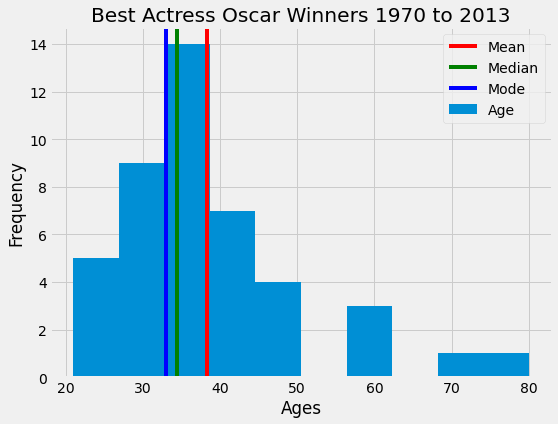

In [8]:
actress['Age'].plot.hist(figsize=(8,6))
plt.axvline(x=actress['Age'].mean(), label='Mean', color='red')
plt.axvline(x=actress['Age'].median(), label='Median', color='green')
plt.axvline(x=actress['Age'].mode()[0], label='Mode', color='blue')
plt.xlabel('Ages')
plt.title('Best Actress Oscar Winners 1970 to 2013')
plt.legend()
plt.show()

- For skewed left distributions and/or datasets with low outliers: Mean will be less than the Median 


![image](img/mean_median2.png)

We will therefore use  mean as a measure of center for symmetric distributions with no outliers. Otherwise, the median will be a more appropriate measure of the center of our data.

### Let's Summarize

The three main numerical measures for the center of a distribution are the mode, mean, and the median. 
* The mode is the most frequently occurring value. The mean is the average value, while the median is the middle value.
* The mean is very sensitive to outliers (as it factors in their magnitude), while the median is resistant to outliers.
* The mean is an appropriate measure of center only for symmetric distributions with no outliers. In all other cases, the median should be used to describe the center of the distribution.

### Scenario: Depression

In the workplace, depression is a leading cause of absenteeism and loss of productivity (Greenberg, et al. 1993). To assess the degree to which people suffer from depression, prior to receiving treatment, data were collected on the number of days that 105 patients were depressed prior to starting a new treatment.

In [9]:
depression = pd.read_csv('./depression.csv')
depression.head()

,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,Lithium,Recurrence,36.143,211,33,1
1,1,Imipramine,No Recurrence,105.143,176,49,1
2,1,Imipramine,No Recurrence,74.571,191,50,1
3,1,Lithium,Recurrence,49.714,206,29,2
4,1,Lithium,No Recurrence,14.429,63,29,1


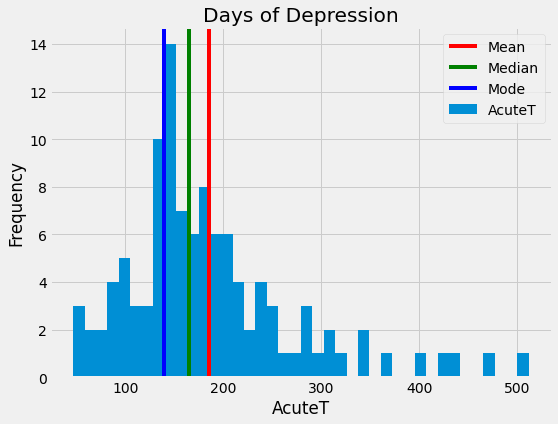

In [10]:
depression['AcuteT'].plot.hist(bins=40, figsize=(8,6))
plt.axvline(x=depression['AcuteT'].mean(), label='Mean', color='red')
plt.axvline(x=depression['AcuteT'].median(), label='Median', color='green')
plt.axvline(x=depression['AcuteT'].mode()[0], label='Mode', color='blue')
plt.xlabel('AcuteT')
plt.title('Days of Depression')
plt.legend()
plt.show()

Q - what is median number of days that patients were depressed?

In [11]:
depression['AcuteT'].median()

165.0

Q - Using this same histogram of 105 patients, which of the following is most likely to be true?
* A. The mean will be larger than the median?
* B. The Median will be larger than the mean?
* c. The mean and median will be about the same?

Answer - A

Q - Using this same histogram of 105 patients, what percentage of patients had 220 or more days of depression?

In [12]:
# Select all the data where AcuteT is greater than or equal to 220
high_depression = depression[depression['AcuteT'] >= 220]
high_depression_percent = len(high_depression) / len(depression) * 100 
high_depression_percent

23.853211009174313

Here, we first calculate the number of patients who experienced 220 or more days of depression(by using the len 
function) is divided by the total number of patients and then multiplied it with 100. 

# One Quantitative Variable: Measures of Spread - Range, IQR, & Outliers 

So far we have learned about different ways to quantify the center of a distribution. A measure of center by itself is not enough, though, to describe a distribution. Consider the following two distributions of exam scores. Both distributions are centered at 70 (the median of both distributions is approximately 70), but the distributions are quite different. The first distribution has a much larger variability in scores compared to the second one.

![image](img/spread1.png)

In order to describe the distribution, we therefore need to supplement the graphical display not only with a measure of center, but also with a measure of the variability (or spread) of the distribution.

In this section, we will discuss the three most commonly used measures of spread:

* Range
* Inter-quartile range (IQR)
* Standard deviation

Like the different measures of center, these measures provide different ways to quantify the variability of the distribution.

## Range 

The range covered by the data is the most intuitive measure of variability. The range is exactly the distance between the smallest data point (min) and the largest one (Max).

**Range = Max - min** 

Note: When we first looked at the histogram, and tried to get a first feel for the spread of the data, we were actually approximating the range, rather than calculating the exact range. 

### Example: Best Actress Oscar Winners

In [13]:
min_age = actress['Age'].min()
max_age = actress['Age'].max()
age_range = max_age - min_age
age_range

59

The range covered by all the data is 59 years.

## Inter-Quartile Range (IQR)

While the range quantifies the variability by looking at the range covered by ALL the data, the IQR measures the variability of a distribution by giving us the range covered by the MIDDLE 50% of the data.

The following picture illustrates this idea: (Think about the horizontal line as the data ranging from the min to the Max).

![image](img/IQR1.png)

Here is how the IQR is actually found:

1. Arrange the data in increasing order, and find the median M. Recall that the median divides the data, so that 50% of the data points are below the median, and 50% of the data points are above the median.

![image](img/IQR2.png)

2. Find the median of the lower 50% of the data. This is called the first quartile of the distribution, and the point is denoted by Q1. Note from the picture that Q1 divides the lower 50% of the data into two halves, containing 25% of the data points in each half. Q1 is called the first quartile, since one quarter of the data points fall below it.

![image](img/IQR3.png)

3. Repeat this again for the top 50% of the data. Find the median of the top 50% of the data. This point is called the third quartile of the distribution, and is denoted by Q3. Note from the picture that Q3 divides the top 50% of the data into two halves, with 25% of the data points in each. Q3 is called the third quartile, since three quarters of the data points fall below it.

![image](img/IQR4.png)

4. The middle 50% of the data falls between Q1 and Q3, and therefore:
IQR = Q3 - Q1

![image](img/IQR5.png)



### Comments

1. The last picture shows that Q1, M, and Q3 divide the data into four quarters with 25% of the data points in each, where the median is essentially the second quartile. The use of IQR = Q3 - Q1 as a measure of spread is therefore particularly appropriate when the median M is used as a measure of center.

2. We can define a bit more precisely what is considered the bottom or top 50% of the data. The bottom (top) 50% of the data is all the observations whose position in the ordered list is to the left (right) of the location of the overall median M. The following picture will visually illustrate this for the simple cases of n = 7 and n = 8

![image](img/IQR6.png)

Note that when n is odd (as in n = 7 above), the median is not included in either the bottom or top half of the data; When n is even (as in n = 8 above), the data are naturally divided into two halves.

### Calculating the IQR

In [14]:
# helpful function to get the summary statistics
actress['Age'].describe()

count    44.000000
mean     38.340909
std      12.736951
min      21.000000
25%      30.750000
50%      34.500000
75%      42.000000
max      80.000000
Name: Age, dtype: float64

In [15]:
# this gives the Q1
Q1 = actress['Age'].quantile(.25)
Q1

30.75

In [16]:
Q3 = actress['Age'].quantile(.75)
Q3

42.0

In [17]:
IQR = Q3 - Q1
IQR 

11.25

Note that in this example, the range covered by all the ages is 59 years, while the range covered by the middle 50% of the ages is only 11.5 years. While the whole dataset is spread over a range of 59 years, the middle 50% of the data is packed into only 11.5 years. 

### Comment

Software packages use different formulas to calculate the quartiles Q1 and Q3. This should not worry you, as long as you understand the idea behind these concepts. Note that Q1 and Q3 as reported by the various software packages differ from each other and are also slightly different from the ones we found here. There are different acceptable ways to find the median and the quartiles. These can give different results occasionally, especially for datasets where n (the number of observations) is fairly small. As long as you know what the numbers mean, and how to interpret them in context, it doesn't really matter much what method you use to find them, since the differences are really negligible.

### Using the IQR to Detect Outliers

So far we have quantified the idea of center, and we are in the middle of the discussion about measuring spread, but we haven't really talked about a method or rule that will help us classify extreme observations as outliers. The IQR is used as the basis for a rule of thumb for identifying outliers.

### The 1.5(IQR) Criterion for Outliers

An observation is considered a suspected outlier if it is:

* below Q1 - 1.5(IQR) or
* above Q3 + 1.5(IQR)

The following picture illustrates this rule:

![image](img/IQR7.png)

### Example: Best Actress Oscar Winners

We will continue with the Best Actress Oscar winners example.Recall that when we first looked at the histogram of ages of Best Actress Oscar winners, there were five observations that looked like possible outliers:

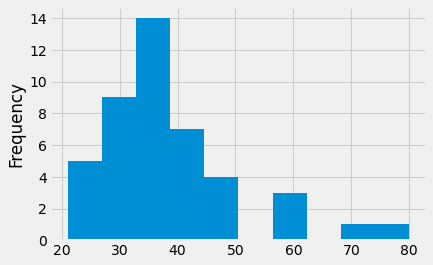

In [18]:
actress['Age'].plot.hist();

We can now use the 1.5(IQR) criterion to check whether the five observations should indeed be classified as outliers:



For this example we found that Q1 = 30.75, Q3 = 42  and IQR = 11.25

In [19]:
Q1 - 1.5*IQR

13.875

In [20]:
Q3 + 1.5*IQR

58.875

The 1.5(IQR) criterion tells us that any observation that is below 13.88 or above 58.87 is considered a suspected outlier.

We therefore conclude that all the five observations should be flagged as suspected outliers in the distribution of ages. Note that since the smallest observation is 21, there are no suspected low outliers in this distribution.

### Understanding Outliers

We just practiced one way to 'flag' possible outliers. Why is it important to identify possible outliers, and how should they be dealt with? The answers to these questions depend on the reasons for the outlying values. Here are several possibilities:

* 1. Even though it is an extreme value, if an outlier can be understood to have been produced by essentially the same sort of physical or biological process as the rest of the data, and if such extreme values are expected to eventually occur again, then such an outlier indicates something important and interesting about the process you're investigating, and it should be kept in the data.

* 2. If an outlier can be explained to have been produced under fundamentally different conditions from the rest of the data (or by a fundamentally different process), such an outlier can be removed from the data if your goal is to investigate only the process that produced the rest of the data.

* 3. An outlier might indicate a mistake in the data (like a typo, or a measuring error), in which case it should be corrected if possible or else removed from the data before calculating summary statistics or making inferences from the data (and the reason for the mistake should be investigated).

**Here are examples of each of these types of outliers:**

The following histogram displays the magnitude of 460 earthquakes in California, occurring in the year 2000, between August 28 and September 9:

![image](img/IQR8.png)

**Identifying the outlier:**

On the very far right edge of the display (beyond 4.8), we see a low bar; this represents one earthquake (because the bar has height of 1) that was much more severe than the others in the data.

**Understanding the outlier:**

In this case, the outlier represents a much stronger earthquake, which is relatively rarer than the smaller quakes that happen more frequently in California.

**How to handle the outlier:**

For many purposes, the relatively severe quakes represented by the outlier might be the most important (because, for instance, that sort of quake has the potential to do more damage to people and infrastructure). The smaller-magnitude quakes might not do any damage, or even be felt at all. So, for many purposes it could be important to keep this outlier in the data.

2.The following histogram displays the monthly percent return on the stock of Phillip Morris (a large tobacco company) from July 1990 to May 1997:

![image](img/IQR9.png)

**Identifying the outlier:**

On the display, we see a low bar far to the left of the others; this represents one month’s return (because the bar has height of 1), where the value of Phillip Morris stock was unusually low.

**Understanding the outlier:**

The explanation for this particular outlier is that, in the early 1990s, there were highly-publicized federal hearings being conducted regarding the addictiveness of smoking, and there was growing public sentiment against the tobacco companies. The unusually low monthly value in the Phillip Morris dataset was due to public pressure against smoking, which negatively affected the company’s stock for that particular month.

**How to handle the outlier:**

In this case, the outlier was due to unusual conditions during one particular month that aren’t expected to be repeated, and that were fundamentally different from the conditions that produced the values in all the other months. So in this case, it would be reasonable to remove the outlier, if we wanted to characterize the ‘typical’ monthly return on Phillip Morris stock.



3.When archaeologists dig up objects such as pieces of ancient pottery, chemical analysis can be performed on the artifacts. The chemical content of pottery can vary depending on the type of clay as well as the particular manufacturing technique. The following histogram displays the results of one such actual chemical analysis, performed on 48 ancient Roman pottery artifacts from archaeological sites in Britain:

![image](img/IQR10.png)

**Identifying the outlier:**

On the display, we see a low bar far to the right of the others; this represents one piece of pottery (because the bar has a height of 1), which has a suspiciously high manganous oxide value.

**Understanding the outlier:**

Based on comparison with other pieces of pottery found at the same site, and based on expert understanding of the typical content of this particular compound, it was concluded that the unusually high value was most likely a typo that was made when the data were published in the original 1980 paper (it was typed as “.394” but it was probably meant to be “.094”).

**How to handle the outlier:**

In this case, since the outlier was judged to be a mistake, it should be removed from the data before further analysis. In fact, removing the outlier is useful not only because it’s a mistake, but also because doing so reveals important structure that was otherwise hidden. This feature is evident on the next display:

![image](img/IQR11.png)

When the outlier is removed, the display is re-scaled so that now we can see the set of 10 pottery pieces that had almost no manganous oxide. These 10 pieces might have been made with a different potting technique, so identifying them as different from the rest is historically useful. This feature was only evident after the outlier was removed.

### Let's Summarize

* The range covered by the data is the most intuitive measure of spread and is exactly the distance between the smallest data point (min) and the largest one (Max).

* Another measure of spread is the inter-quartile range (IQR), which is the range covered by the middle 50% of the data.

* IQR = Q3 - Q1, the difference between the third and first quartiles. The first quartile (Q1) is the value such that one quarter (25%) of the data points fall below it, or the median of the bottom half of the data. The third quartile is the value such that three quarters (75%) of the data points fall below it, or the median of the top half of the data.

* The IQR should be used as a measure of spread of a distribution only when the median is used as a measure of center.

* The IQR can be used to detect outliers using the 1.5(IQR) criterion. Outliers are observations that fall below Q1 - 1.5(IQR) or above Q3 + 1.5(IQR). 

# One Quantitative Variable: Measures of Spread - Boxplots 

## Boxplot: The Five Number Summary

Before we move on to the third measure of spread (standard deviation), we'll summarize what we've learned so far about measuring spread and use it to introduce another graphical display of the distribution of a quantitative variable, the boxplot.

So far, in our discussion about measures of spread, the key players were:

* the extremes (min and Max), which provide the range covered by all the data; and
* the quartiles (Q1, M and Q3), which together provide the IQR, the range covered by the middle 50% of the data.

The combination of all five numbers (min, Q1, M, Q3, Max) is called the five number summary, and provides a quick numerical description of both the center and spread of a distribution.

### Example: Best Actress Oscar Winners

To find the five number summary we can use the pandas describe method.

In [21]:
actress['Age'].describe()

count    44.000000
mean     38.340909
std      12.736951
min      21.000000
25%      30.750000
50%      34.500000
75%      42.000000
max      80.000000
Name: Age, dtype: float64

### Scenario: Best Actor Oscar Winners

In [22]:
actor = pd.read_excel('./actor_2013.xls')
actor.head()

,Age
0,43
1,42
2,48
3,49
4,56


In [23]:
actor['Age'].describe()

count    44.000000
mean     44.977273
std       9.749153
min      29.000000
25%      38.000000
50%      43.500000
75%      50.250000
max      76.000000
Name: Age, dtype: float64

### Boxplot: Constructing a Boxplot

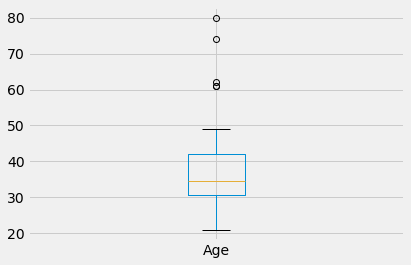

In [24]:
actress['Age'].plot.box();

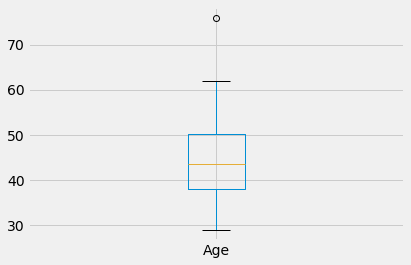

In [25]:
actor['Age'].plot.box();

###  Boxplot: Side-By-Side Boxplots

As we learned in the beginning of this module, the distribution of a quantitative variable is best represented graphically by a histogram. Boxplots are most useful when presented side-by-side for comparing and contrasting distributions from two or more groups.

### Example: Best Actor/Actress Oscar Winners

So far we have examined the age distributions of Oscar winners for males and females separately.

It will be interesting to compare the age distributions of actors and actresses who won best acting Oscars. To do that we will look at side-by-side boxplots of the age distributions by gender.

In [26]:
# merge the two datasets together to make ploting easier

d = {'actress_age':list(actress['Age']),
    'actor_age':list(actor['Age'])}
oscars = pd.DataFrame(data=d)
oscars

,actress_age,actor_age
0,34,43
1,34,42
2,27,48
3,37,49
4,42,56
5,41,38
6,36,60
7,32,30
8,41,40
9,33,42


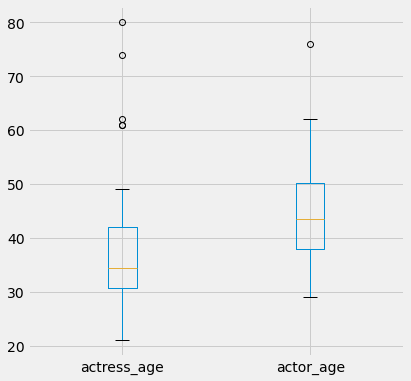

In [27]:
oscars.plot.box(figsize=(6,6));

In [28]:
oscars.describe()

,actress_age,actor_age
count,44.000000,44.000000
mean,38.340909,44.977273
std,12.736951,9.749153
min,21.000000,29.000000
25%,30.750000,38.000000
50%,34.500000,43.500000
75%,42.000000,50.250000
max,80.000000,76.000000


Based on the graph and numerical measures, we can make the following comparison between the two distributions:

**Center:** The graph reveals that the age distribution of the males is higher than the females' age distribution. This is supported by the numerical measures. The median age for females (34.5) is lower than for the males (43.5). Actually, it should be noted that even the third quartile of the females' distribution (42) is lower than the median age for males. We therefore conclude that in general, actresses win the Best Actress Oscar at a younger age than actors do.

**Spread:** Judging by the range of the data, there is much more variability in the females' distribution (range = 59) than there is in the males' distribution (range = 47). On the other hand, if we look at the IQR, which measures the variability only among the middle 50% of the distribution, we see slightly more spread in the ages of males (IQR = 12.5) than females (IQR = 11.5). We conclude that among all the winners, the actors' ages are more alike than the actresses' ages. However, the middle 50% of the age distribution of actresses is more homogeneous than the actors' age distribution.

**Outliers:** We see that we have outliers in both distributions. There is only one high outlier in the actors' distribution (76, Henry Fonda, On Golden Pond), compared with five high outliers in the actresses' distribution.

### Example: Temperature of Pittsburgh vs. San Francisco

In order to compare the average high temperatures of Pittsburgh to those in San Francisco we will look at the following side-by-side boxplots, and supplement the graph with the descriptive statistics of each of the two distributions.



![image](img/box0.png)

![image](img/box1.png)

When looking at the graph, the similarities and differences between the two distributions are striking. Both distributions have roughly the same center (medians are 61.4 for Pitt, and 62.7 for San Francisco). However, the temperatures in Pittsburgh have a much larger variability than the temperatures in San Francisco (Range: 49 vs. 12. IQR: 36.5 vs. 5).

The practical interpretation of the results we got is that the weather in San Francisco is much more consistent than the weather in Pittsburgh, which varies a lot during the year. Also, because the temperatures in San Francisco vary so little during the year, knowing that the median temperature is around 63 is actually very informative. On the other hand, knowing that the median temperature in Pittsburgh is around 61 is practically useless, since temperatures vary so much during the year, and can get much warmer or much colder.

Note that this example provides more intuition about variability by interpreting small variability as consistency, and large variability as lack of consistency. Also, through this example we learned that the center of the distribution is more meaningful as a typical value for the distribution when there is little variability (or, as statisticians say, little "noise") around it. When there is large variability, the center loses its practical meaning as a typical value.

### Scenario: Gradution Rate


The percentage of each entering Freshman class that graduated on time was recorded for each of six colleges at a major university over a period of several years. (Source: This data is distributed with the software package, Data Desk. (1993). Ithaca, NY: Data Description, Inc., and appears in http://lib.stat.cmu.edu/DASL/)

In order to compare the graduation rates among the different colleges, we created side-by-side boxplots (graduation rate by college), and supplemented the graph with numerical measures.

![image](img/box2.png)

![image](img/box3.png)

Q - Based on the boxplots and data, which of the six colleges has the best on-time graduation rate?

#answer

College D

Why: - 

This college has the largest median graduation rates (79%), but it also has the smallest variation in graduation rates over the years (range = 10.5%, IQR = 4.45%). This means that even in years when college D has a relatively small graduation rate, it is not MUCH smaller than the median (min = 74.1%, Median = 79%), and is still higher than most graduation rates at the other colleges. hese data suggest that College D has the best on-time graduation rate.

### Let's Summarize

* The five-number summary of a distribution consists of the median (M), the two quartiles (Q1, Q3) and the extremes (min, Max).
* The five-number summary provides a complete numerical description of a distribution. The median describes the center, and the extremes (which give the range) and the quartiles (which give the IQR) describe the spread.
* The boxplot graphically represents the distribution of a quantitative variable by visually displaying the five number summary and any observation that was classified as a suspected outlier using the 1.5 (IQR) criterion.
* Boxplots are most useful when presented side-by-side to compare and contrast distributions from two or more groups.

### Exercise: Creating Side-by-Side Boxplots

The objectives of this activity are:

* to teach you how to use to produce side-by-side boxplots and the relevant descriptive statistics,
* to let you practice comparing and contrasting distributions, and
* to help you gain more intuition about variability through the interpretation of your results in context.

The percentage of each entering Freshman class that graduated on time was recorded for each of six colleges at a major university over a period of several years. (Source: This data is distributed with the software package, Data Desk. (1993). Ithaca, NY: Data Description, Inc., and appears in http://lib.stat.cmu.edu/DASL/)

In order to compare the graduation rates among the different colleges, we will create side-by-side boxplots (graduation rate by college), and supplement the graph with numerical measures.

In [29]:
# read the data 
grad_data = pd.read_excel('./graduation.xls')
grad_data.head()

FileNotFoundError: [Errno 2] No such file or directory: './graduation.xls'

In [ ]:
# to see the five point summary we can use the describe method
grad_data.describe()

But this summary shows for all the college. To break the summary by college we have to use the groupby method in pandas.

In [ ]:
# first create the groupby object then apply the describe method
grad_data.groupby('College').describe()

In [ ]:
grad_data.boxplot(by='College',column='%_grad_on_time', figsize=(7,6));

In [ ]:
# To remove the grid, pass the parameter grid=False
grad_data.boxplot(by='College',column='%_grad_on_time', figsize=(7,6), grid=False);

In [ ]:
grad_data.groupby('College').describe()

**Q** - If you had to choose one college among the six colleges based on this data, which college would it be? Explain your reasoning.

#### Answer - 

If I had to choose one college based on the graduation rates, I would choose college D. Not only does this college have the largest median graduation rates, but it also has the smallest variation in graduation rates over the years. This means that even in years when college D has a relatively small graduation rate, it is not MUCH smaller than the median (min = 74.1%, Median = 79%), and is still higher than most graduation rates at the other colleges. In particular, the smallest graduation rate that occurred in college D (74.1%), is still higher than: • the highest graduation rate at colleges A and E, • the third quartile of the distribution of graduation rates at colleges B and C, and • the median graduation rate at college F

**Q** - If you were debating between colleges B and F only, which one would you choose based on this data? Explain your reasoning.

#### Answer - 

While Colleges B and F have about the same median graduation rate (B: 70.15%, F: 72%), there is a big difference in the variation. College F has a very large variation, and therefore a much less consistent gradation rate over the years (it can get as low as 57.7%). College B, on the other hand, has a much more consistent graduation rate (small variability), and in that sense, college B is less "risky." Since I am not a "risk taker," and since both colleges have approximately the same median graduation rate, my choice between the two would be college B.

# One Quantitative Variable: Measures of Spread - Standard Deviation 

### Introduction

So far, we have introduced two measures of spread; the range (covered by all the data) and the inter-quartile range (IQR), which looks at the range covered by the middle 50% of the distribution. We also noted that the IQR should be paired as a measure of spread with the median as a measure of center. We now move on to another measure of spread, the standard deviation, which quantifies the spread of a distribution in a completely different way.

### Idea

The idea behind the standard deviation is to quantify the spread of a distribution by measuring how far the observations are from their mean. The standard deviation gives the average (or typical distance) between a data point and the mean.

### Notation

There are many notations for the standard deviation: SD, s, Sd, StDev. Here, we'll use SD as an abbreviation for standard deviation, and use s as the symbol.

### Calculation

In order to get a better understanding of the standard deviation, it would be useful to see an example of how it is calculated. In practice, we will use a computer to do the calculation.

### Example: Video Store Customers

The following are the number of customers who entered a video store in 8 consecutive hours:

7, 9, 5, 13, 3, 11, 15, 9 

To find the standard deviation of the number of hourly customers:

![image](img/SD1.png)

Recall that the average number of customers who enter the store in an hour is 9. The interpretation of SD = 4 is that on average, the actual number of customers that enter the store each hour is 4 away from 9. 

**Comment:**

The importance of the numerical figure that we found in #4 above called the variance (=16 in our example) will be discussed much later in the course when we get to the inference part.

### Scenario: Instructor Ratings

The concept of standard deviation is less intuitive as a measure of spread than the range or the IQR. The following activity is designed to help you develop a better intuition for the standard deviation.



#### Background

At the end of a statistics course, the 27 students in the class were asked to rate the instructor on a number scale of 1 to 9 (1 being "very poor," and 9 being "best instructor I've ever had"). The following table provides three hypothetical rating data:

![image](img/SD2.png)

And here are the histograms of the data:

![image](img/SD3.png)
![image](img/SD4.png)

**Q-** Assume that the average rating in each of the three classes is 5 (which should be visually reasonably clear from the histograms), and recall the interpretation of the SD as a "typical" or "average" distance between the data points and their mean.

Judging from the table and the histograms, which class would have the largest standard deviation?

#### Answer -
In class II most of the observations are far from the mean (at 1 or 9). The average distance between the observations and the mean in this case would be the largest.

### Properties of the Standard Deviation

* 1.It should be clear from the discussion thus far that the SD should be paired as a measure of spread with the mean as a measure of center.

* 2.Note that the only way, mathematically, in which the SD = 0, is when all the observations have the same value (Ex: 5, 5, 5, ... , 5), in which case, the deviations from the mean (which is also 5) are all 0. This is intuitive, since if all the data points have the same value, we have no variability (spread) in the data, and expect the measure of spread (like the SD) to be 0. Indeed, in this case, not only is the SD equal to 0, but the range and the IQR are also equal to 0. Do you understand why?

* 3.Like the mean, the SD is strongly influenced by outliers in the data. Consider the example concerning video store customers: 3, 5, 7, 9, 9, 11, 13, 15 (data ordered). If the largest observation was wrongly recorded as 150, then the average would jump up to , and the standard deviation would jump up to SD = 50.3. Note that in this simple example, it is easy to see that while the standard deviation is strongly influenced by outliers, the IQR is not. The IQR would be the same in both cases, since, like the median, the calculation of the quartiles depends only on the order of the data rather than the actual values.

The last comment leads to the following very important conclusion:

### Choosing Numerical Summaries

Use the mean and the standard deviation as measures of center and spread only for reasonably symmetric distributions with no outliers.

Use the five-number summary (which gives the median, IQR and range) for all other cases.

**Q-** Assume that the average rating in each of the three classes is 5 (which should be visually reasonably clear from the histograms), and recall the interpretation of the SD as a "typical" or "average" distance between the data points and their mean. Judging from the table and the histograms, which class would have the largest standard deviation, and which one would have the smallest standard deviation? Explain your reasoning.

#### Answer - 
Class 1 would have the lowest standard deviation because most of the data lie at the mean of the distribution to the average squared distance between these points and the mean will be zero so the deviation also will be less. The standard deviation will be larger in the case of class second because most of the data are at 1 or 9 will is very far extreme left of right of the mean.

**Now check your intuition by finding the actual standard deviations of the three rating distributions.**

In [ ]:
ratings = pd.read_excel('./sdintuition.xls')
ratings.head()

In [ ]:
# we can calculate the standard deviation in pandas using the std function
ratings.std()

We can see that the standard deviation is lowest in class I and highest in class II.

### Standard Deviation Rule

In the previous activity we tried to help you develop better intuition about the concept of standard deviation. The rule that we are about to present, called "The Standard Deviation Rule" (also known as "The Empirical Rule") will hopefully also contribute to building your intuition about this concept.

Consider a symmetric mound-shaped distribution:

![image](img/SD5.png)

For distributions having this shape (also known as the normal shape), the following rule applies:
The Standard Deviation Rule:

* Approximately 68% of the observations fall within 1 standard deviation of the mean.
* Approximately 95% of the observations fall within 2 standard deviations of the mean.
* Approximately 99.7% (or virtually all) of the observations fall within 3 standard deviations of the mean.

The following picture illustrates this rule:

![image](img/SD6.png)

This rule provides another way to interpret the standard deviation of a distribution, and thus also provides a bit more intuition about it.

To see how this rule works in practice, consider the following example:

### Example: Male Height

The following histogram represents height (in inches) of 50 males. Note that the data are roughly normal, so we would like to see how the Standard Deviation Rule works for this example.

![image](img/SD7.png)

Below are the actual data, and the numerical summaries of the distribution. Note that the key players here, the mean and standard deviation, have been highlighted.



![image](img/SD8.png)
![image](img/SD9.png)

To see how well the Standard Deviation Rule works for this case, we will find what percentage of the observations falls within 1, 2, and 3 standard deviations from the mean, and compare it to what the Standard Deviation Rule tells us this percentage should be.



![image](img/SD10.png)

It turns out the Standard Deviation Rule works very well in this example.

## Standard Deviation Rule: Applications

The following example illustrates how we can apply the Standard Deviation Rule to variables whose distribution is known to be approximately normal.

### Example: Length of Human Pregnancy

The length of the human pregnancy is not fixed. It is known that it varies according to a distribution which is roughly normal, with a mean of 266 days, and a standard deviation of 16 days. (Source: Figures are from Moore and McCabe, Introduction to the Practice of Statistics).

First, lets' apply the Standard Deviation Rule to this case by drawing a picture:

![image](img/SD11.png)

We can now use the information provided by the Standard Deviation Rule about the distribution of the length of human pregnancy, to answer some questions. For example:

**Question:** How long do the middle 95% of human pregnancies last?

**Answer:** The middle 95% of pregnancies last within 2 standard deviations of the mean, or in this case 234-298 days.

**Question:** What percent of pregnancies last more than 298 days?

**Answer:** To answer this consider the following picture:

![image](img/SD12.png)

Since 95% of the pregnancies last between 234 and 298 days, the remaining 5% of pregnancies last either less than 234 days or more than 298 days. Since the normal distribution is symmetric, these 5% of pregnancies are divided evenly between the two tails, and therefore 2.5% of pregnancies last more than 298 days.

**Question:** How short are the shortest 2.5% of pregnancies?
    
**Answer:** Using the same reasoning as in the previous question, the shortest 2.5% of human pregnancies last less than 234 days.

**Question:** What percent of human pregnancies last more than 266 days?

**Answer:** Since 266 days is the mean, approximately 50% of pregnancies last more than 266 days.


In general, the larger the animal the longer the length of pregnancy (also called gestation period). For the horse, for example, the gestation period varies roughly according to a normal distribution with a mean of 336 days and a standard deviation of 3 days (Source: These figures are from Moore and McCabe, Introduction to the Practice of Statistics). Use the Standard Deviation Rule to answer the following questions. This picture of the SD rule applied to this distribution will help:



![image](../img/SD13.png)

**Qusetion-** Almost all (99.7%) horse pregnancies fall in what range of lengths?
    * Above 336 days
    * Below 336 days
    * Between 333 and 339 days
    * Between 330 and 342 days
    * Between 327 and 345 days 
    
**Answer-** 
Between 327 and 345 days. The Standard Deviation Rule tells us that virtually all the data fall within 3 standard deviations of the mean, which in this case is exactly between 336 - 3(3) = 327, and 336 + 3(3) = 345. 

**Question-** What percentage of horse pregnancies last longer than 339 days?
    * 2.5% 
    * 16% 
    * 50% 
    * 68% 
    * 100% 
    
**Answer-** 
16%. According to the SD rule, 68% of horse pregnancies last between 336 - 3 = 333 and 336 + 3 = 339 days, which means that the remaining 32% of horse pregnancies are divided evenly between lasting less than 333 days and lasting more than 339 days. We therefore conclude that 16% of horse pregnancies last more than 339 days. 

### Let's Summarize

* The standard deviation measures the spread by reporting a typical (average) distance between the data points and their average.
* It is appropriate to use the SD as a measure of spread with the mean as the measure of center.
* Since the mean and standard deviations are highly influenced by extreme observations, they should be used as numerical descriptions of the center and spread only for distributions that are roughly symmetric, and have no outliers.
* For symmetric mound-shaped distributions, the Standard Deviation Rule tells us what percentage of the observations falls within 1, 2, and 3 standard deviations of the mean, and thus provides another way to interpret the standard deviation's value for distributions of this type. 

# Exercise -  Drinking Habits and Integrity of College Students

A student survey was conducted at a major university. Data were collected from a random sample of 236 undergraduate students, and the information that was collected included physical characteristics (such as height and handedness), study habits, academic performance and attitudes, and social behaviors. In this exercise we will focus on exploring relationships between some of those variables. Note that (a) these are real data, and (b) the symbol * in the worksheet means that this observation is not available (this is known as a 'missing value'). 

### Questions

**Q1.** What are the drinking habits of students at this university? In particular, what is the typical number of drinks a student has during a week? Do the data suggest that drinking is a problem in this university?

**Q2.** One of the statistics professors at this university uses the honor system when giving exams. If there were cheating going on during her exams, would the professor be likely to know about it?

### variables

`Gender` - Male or Female

`Alcohol` - Number of alcoholic beverages consumed in a typical week

`Height` - Self-reported height (in inches)

`Cheat` - Would you tell the instructor if you saw somebody cheating on an exam? (0=No, 1=Yes) 

In [ ]:
## Read the data 
drinking = pd.read_excel('./drinking.xls')

In [ ]:
# look at the first five rows of data 
drinking.head()

In [ ]:
# Replace the missing values with np.nan
drinking.replace('*', np.nan, inplace=True)
drinking.head()

### 1.Check Data Format

**Question-** Out of the first ten students in the datafile, how many drink 15 or more alcoholic beverages per week?

In [ ]:
# select the first 10 student
drinking.head(10)

#### Solution 1. Doing Manually 

Answer - 5 

#### Solution 2. Using Pandas Boolean Indexing

In [ ]:
# select the first 10 students using head method
drink_first10 = drinking.head(10)
drink_first10

In [ ]:
# use len and boolen indexing to get the result 
len(drink_first10[drink_first10['Alcohol'] >= 15])

**Question** - Out of the first ten students in the datafile, how many alcoholic beverages per week does the tallest student drink?


In [ ]:
drink_first10[drink_first10['Height']== drink_first10['Height'].max()]

Answer - 15

**Question** - What is the height of the first male in the datafile who would report on cheating? 

In [ ]:
drinking[(drinking['Gender'] == 'Male') & (drinking['Cheat'] == 1)].head()

Answer - 64 

### Question 1.

**What are the drinking habits of students at this university? In particular, what is the typical number of drinks a student has during a week? Do the data suggest that drinking is a problem in this university?**

##### Reflect on Question - 

Before analyzing the data and discovering the actual drinking habits of the students, try to predict what the data will show (use your own experience and intuition). 

**Your Answer -**  

### Analyze Data 

**Identify the relevant variables:**
   * Gender
   * Alcohal
   * Height 
   * Cheat 

Answer - 

**Classify the relevant variables:**
   * Is it a Quantitative or Categorical variable 

### Exploratory Analysis

Now that we have identified and classified the relevant variable(s), we use exploratory data analysis methods to help us make important features of the data visible.

**Determine Displays and Measures:**

**A meaningful display is:**
   * Side-by-side boxplots
   * Scatterplot
   * Two-way Table
   * Piechart
   * Histogram


Answer - 

**A meaningful numerical summary to supplement the above display is**

Answer -  

#### Conduct Analysis

In [ ]:
# Plot a histogram 
drinking['Alcohol'].plot.hist();

In [ ]:
drinking['Alcohol'].describe()

**Results (Question One)**

Remember, using the display and numerical summary, you need to describe the features of a single quantitative distribution.

Do that by describing the key features of the display and by supporting your description with numerical measures.

Keep in mind that the appropriate numerical measures for the current situation (i.e., measures of center and spread) will depend on the shape of the distribution you find.

**Your Answer -**  

**Draw Conclusions (Question One)**

**Your Answer-**

### Question 2. 

**One of the statistics professors at this university uses the honor system when giving exams. If there were cheating going on during her exams, would the professor be likely to know about it?**

**Reflect on Question (Question Two)**

In this first step, we think about the question and use our intuition and/or experience to try and predict what the results will show. Later, we will compare what we initially thought to what we actually find when we analyze the data.

Note that we will repeat the middle three steps in the work plan (Reflect on Question, Analyze Data, and Draw Conclusions) for each of the questions in the analysis.

Before analyzing the data and discovering how the students will react if they witness cheating during an exam, try to predict what the data will show (use your own experience and intuition).

**Your Answer-**

### Analyze Data (Question Two)

#### Plan Analyses

Before choosing the appropriate analyses, it is helpful to:

**Identify the relevant variables:**
    
Which variable(s) among those listed below is/are particularly relevant to the current question?

* Gender
* Alcohol
* Height
* Cheat

**Answer-** 

**Classify the relevant variables:**
   * Is it Quantitative or Categorical?

**Answer-** 

### Exploratory Analysis

Now that we have identified and classified the relevant variable(s), we use exploratory data analysis methods to help us make important features of the data visible. 

#### Determine Displays and Measures

**A meaningful display is:**
   * Side-by-side boxplots
   * Scatterplot
   * Two-way Table
   * Piechart
   * Histogram
   * Bar Chart

**Answer-** 

**A meaningful numerical summary to supplement the above display is**

**Answer-**

### Conduct Analysis (Question Two)

In [ ]:
# Raw count
drinking['Cheat'].value_counts()

In [ ]:
# Percentage 
drinking['Cheat'].value_counts(normalize=True)*100 

In [ ]:
# Plot bar chart
drinking['Cheat'].value_counts().plot.bar();

### Results (Question Two)

Remember, using the display and numerical summary, you need to describe the features of a single quantitative distribution.

Do that by describing the key features of the display and by supporting your description with numerical measures.

Keep in mind that the appropriate numerical measures for the current situation (i.e., measures of center and spread) will depend on the shape of the distribution you find.

**Your Answer-**

### Draw Conclusions (Question Two)

What do the results you got indicate about the question highlighted above (i.e., about the likelihood of the statistics professor knowing about the cheating)? 

**Your Answer-** 

### Summarize

In this final part of out data analysis process, we summarize our work and consider possible implications and limitations of our conclusions. 

write a short summary report of the main findings that you discovered using the data.

**Your Answer-** 